<a href="https://colab.research.google.com/github/michaeledge27/mathModeling/blob/main/projects/ShufflingUnderConstraints.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [140]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [141]:
def initializeCards():
    clubs = ["club.2", "club.3", "club.4", "club.5", "club.6"]
    diamonds = ["diamond.2", "diamond.3", "diamond.4", "diamond.5", "diamond.6"]
    hearts = ["heart.2", "heart.3", "heart.4", "heart.5", "heart.6"]
    spades = ["spade.2", "spade.3", "spade.4"]
    return clubs, diamonds, hearts, spades

In [142]:
# clubs = ["club.2", "club.3", "club.4", "club.5", "club.6"]
# diamonds = ["diamond.2", "diamond.3", "diamond.4", "diamond.5", "diamond.6"]
# hearts = ["heart.2", "heart.3", "heart.4", "heart.5", "heart.6"]
# spades = ["spade.2", "spade.3", "spade.4"]
# west_cards = hearts + diamonds
# north_cards = clubs + spades + diamonds
# east_cards = clubs + hearts
# all_cards = west_cards + north_cards + east_cards

In [143]:
club_spade_positions = [0, 3, 6, 9, 12, 15]      # No clubs or spades
# heart_positions = [1, 4, 7, 10, 13, 16]          # No hearts
# diamond_spade_positions = [2, 5, 8, 11, 14, 17]  # No diamonds or spades

In [144]:
def build_valid_allocation(clubs, diamonds, hearts, spades):
    positions = [None] * 18  # 17 total positions

    for i in range(0, 18):
        if i in club_spade_positions:
            available_cards = hearts + diamonds
        # elif i in heart_positions:
        #     available_cards = diamonds + spades + clubs
        # elif i in diamond_spade_positions:
        #     available_cards = clubs + hearts
        else:
            available_cards = clubs + diamonds + hearts + spades

        # Ensure we have available cards to choose from
        if available_cards:
            card = random.choice(available_cards)
            positions[i] = card

            # Remove the drawn card from the respective suit
            if card.startswith('club'):
                clubs.remove(card)
            elif card.startswith('diamond'):
                diamonds.remove(card)
            elif card.startswith('heart'):
                hearts.remove(card)
            elif card.startswith('spade'):
                spades.remove(card)

    return positions

In [145]:
# # Function to check if an allocation is legal
# def is_legal_allocation(positions):
#     for i in club_spade_positions:
#         if 'club' in positions[i] or 'spade' in positions[i]:
#             return False
#     for i in heart_positions:
#         if 'heart' in positions[i]:
#             return False
#     for i in diamond_spade_positions:
#         if 'diamond' in positions[i] or 'spade' in positions[i]:
#             return False
#     return True

In [146]:
# def legal_allocation(all_cards):
#     while True:
#         random.shuffle(all_cards)
#         if is_legal_allocation(all_cards):
#             return all_cards[:]

In [147]:
def iterate_a_lot(iterations):

    card_count = {f"pos.{pos}": {card: 0 for card in initializeCards()[0] + initializeCards()[1] + initializeCards()[2] + initializeCards()[3]} for pos in range(18)}

    for _ in range(iterations):
        # Reinitialize the cards for each iteration
        clubs, diamonds, hearts, spades = initializeCards()
        allocation = build_valid_allocation(clubs.copy(), diamonds.copy(), hearts.copy(), spades.copy())

        # Count occurrences of each card in each position
        for pos, card in enumerate(allocation):
            if card is not None:  # Check if the card is valid
                card_count[f"pos.{pos}"][card] += 1

    return card_count

In [148]:

# def iterate_a_lot(iterations):
#     clubs, diamonds, hearts, spades = initializeCards()
#     card_types = ['clubs', 'diamonds', 'hearts', 'spades']
#     position_counts = {f"pos.{pos}": {card_type: 0 for card_type in card_types} for pos in range(18)}

#     for _ in range(iterations):
#         # Reinitialize the cards for each iteration
#         clubs, diamonds, hearts, spades = initializeCards()
#         allocation = build_valid_allocation(clubs.copy(), diamonds.copy(), hearts.copy(), spades.copy())

#         # Count occurrences of each card type in each position
#         for pos, card in enumerate(allocation):
#             if card is not None:
#                 if 'club' in card:
#                     position_counts[f"pos.{pos}"]['clubs'] += 1
#                 elif 'diamond' in card:
#                     position_counts[f"pos.{pos}"]['diamonds'] += 1
#                 elif 'heart' in card:
#                     position_counts[f"pos.{pos}"]['hearts'] += 1
#                 elif 'spade' in card:
#                     position_counts[f"pos.{pos}"]['spades'] += 1

#     return position_counts

In [149]:
iterations = 100000
card_count = iterate_a_lot(iterations)

In [150]:
df_distribution = pd.DataFrame(card_count).T
df_proportions = df_distribution.div(iterations)

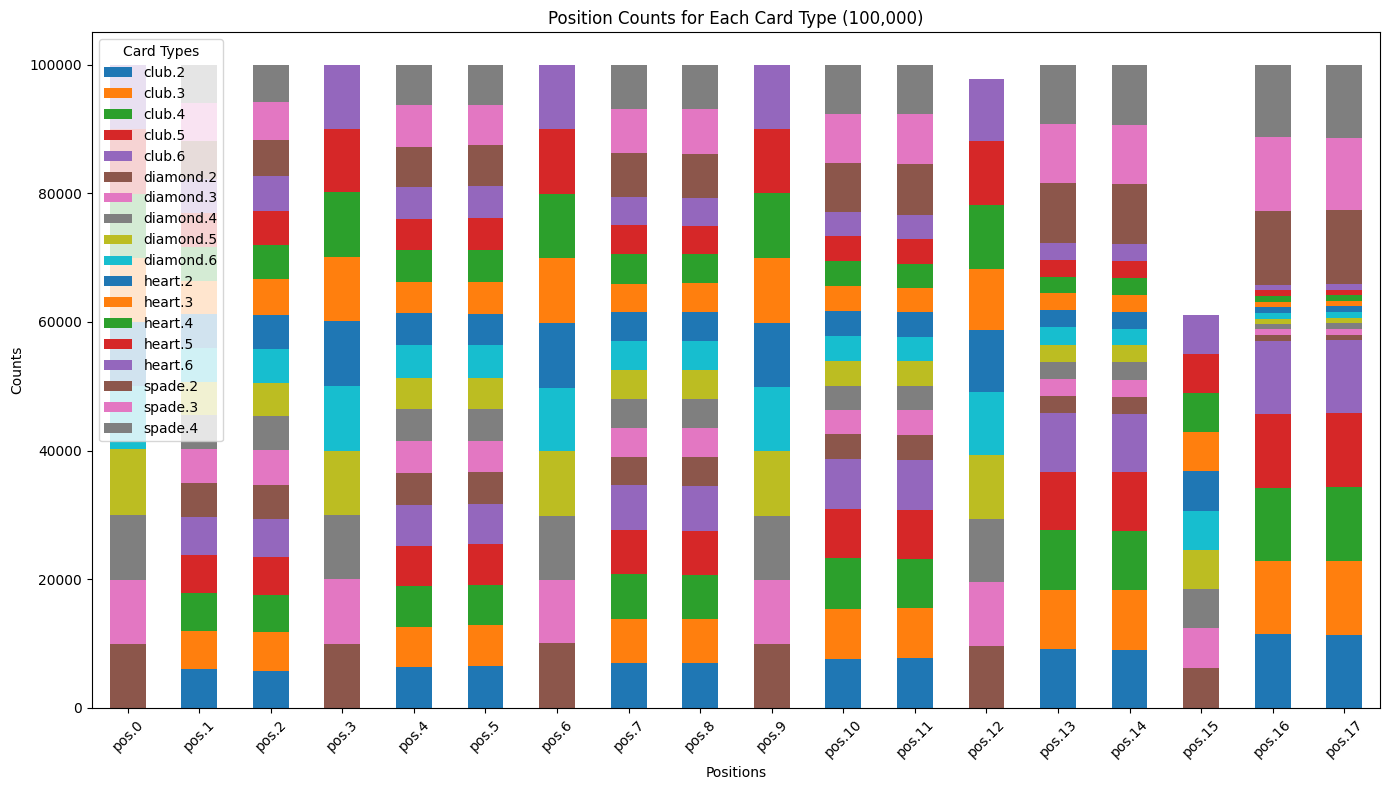

In [151]:
df_distribution.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Position Counts for Each Card Type (100,000)')
plt.xlabel('Positions')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.legend(title='Card Types')
plt.tight_layout()
plt.show()

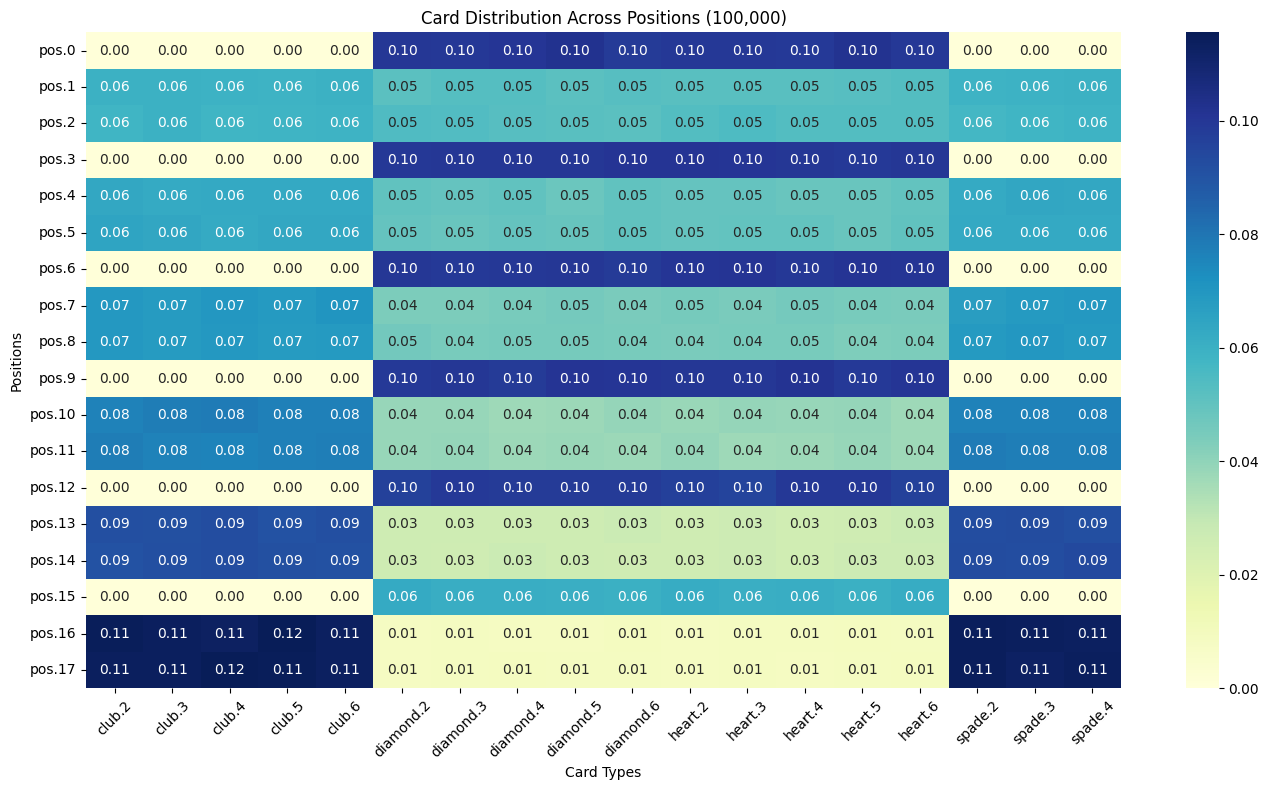

In [152]:
plt.figure(figsize=(14, 8))
sns.heatmap(df_proportions, cmap='YlGnBu', annot=True, fmt=".2f")
plt.title('Card Distribution Across Positions (100,000)')
plt.xlabel('Card Types')
plt.ylabel('Positions')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [153]:
bar_data = df_proportions.sum(axis=0)  # Sum proportions across all positions
bar_data = bar_data.reset_index()  # Reset index to create a DataFrame
bar_data.columns = ['Card Type', 'Proportion']  # Rename columns for clarity

<ipython-input-154-39c3296284cf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bar_data, x='Card Type', y='Proportion', palette='YlGnBu')


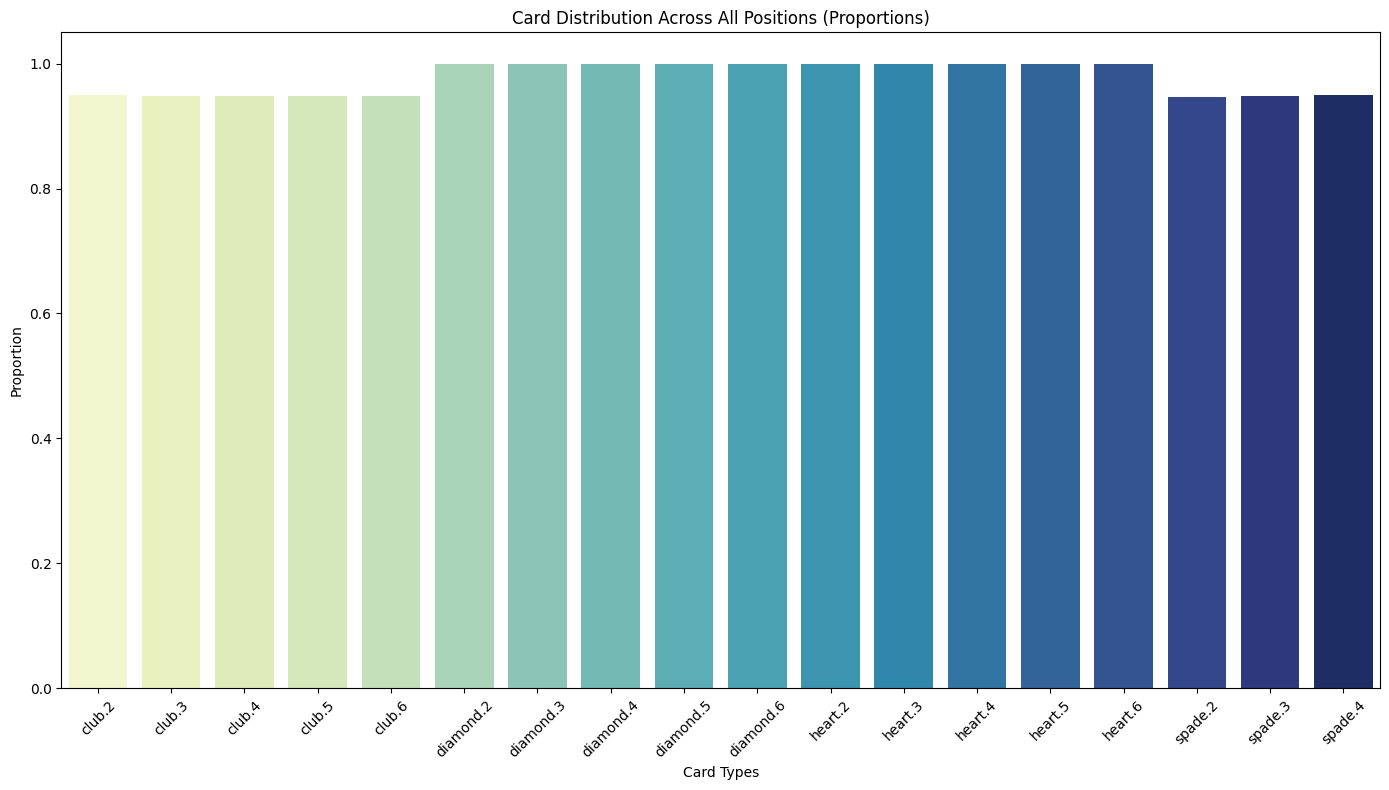

In [154]:
plt.figure(figsize=(14, 8))
sns.barplot(data=bar_data, x='Card Type', y='Proportion', palette='YlGnBu')
plt.title('Card Distribution Across All Positions (Proportions)')
plt.xlabel('Card Types')
plt.ylabel('Proportion')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

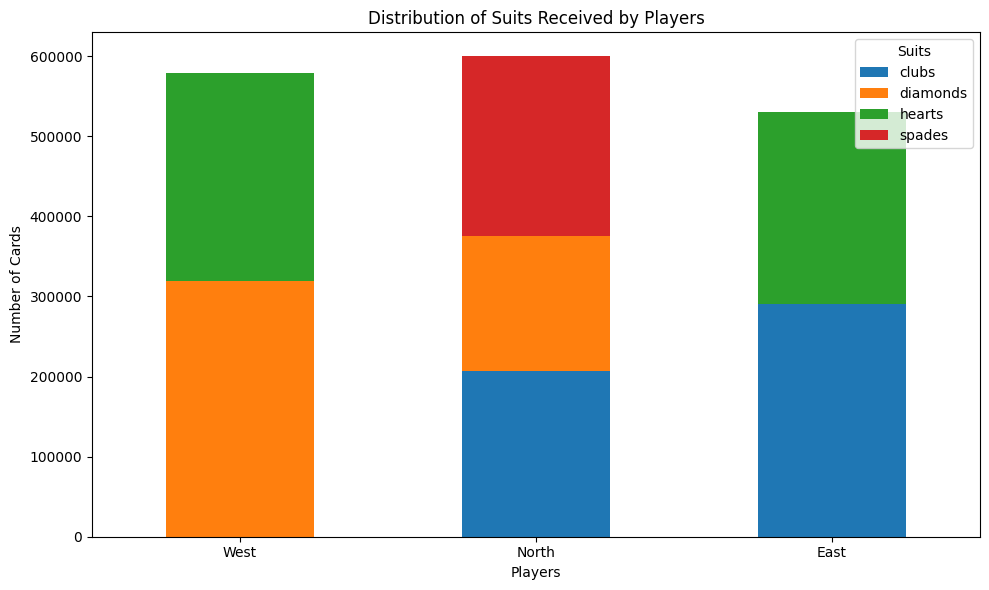

In [155]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def initializeCards():
    clubs = ["club.2", "club.3", "club.4", "club.5", "club.6"]
    diamonds = ["diamond.2", "diamond.3", "diamond.4", "diamond.5", "diamond.6"]
    hearts = ["heart.2", "heart.3", "heart.4", "heart.5", "heart.6"]
    spades = ["spade.2", "spade.3", "spade.4"]
    return clubs, diamonds, hearts, spades

def build_valid_allocation(clubs, diamonds, hearts, spades):
    positions = [None] * 18  # 17 total positions
    for i in range(18):
        if i in club_spade_positions:
            available_cards = hearts + diamonds
        elif i in heart_positions:
            available_cards = diamonds + spades + clubs
        elif i in diamond_spade_positions:
            available_cards = clubs + hearts
        else:
            available_cards = clubs + diamonds + hearts + spades

        if available_cards:
            card = random.choice(available_cards)
            positions[i] = card

            # Remove the drawn card from the respective suit
            if card.startswith('club'):
                clubs.remove(card)
            elif card.startswith('diamond'):
                diamonds.remove(card)
            elif card.startswith('heart'):
                hearts.remove(card)
            elif card.startswith('spade'):
                spades.remove(card)

    return positions

def iterate_a_lot(iterations):
    clubs, diamonds, hearts, spades = initializeCards()
    all_cards = clubs + diamonds + hearts + spades

    # Initialize counts for suits received by each player
    suit_count = {
        "West": {"clubs": 0, "diamonds": 0, "hearts": 0, "spades": 0},
        "North": {"clubs": 0, "diamonds": 0, "hearts": 0, "spades": 0},
        "East": {"clubs": 0, "diamonds": 0, "hearts": 0, "spades": 0},
    }

    for _ in range(iterations):
        allocation = build_valid_allocation(clubs.copy(), diamonds.copy(), hearts.copy(), spades.copy())

        # Count suits for each player based on the allocation
        for pos, card in enumerate(allocation):
            if card is not None:
                if card.startswith('club'):
                    if pos in club_spade_positions:
                        suit_count["West"]["clubs"] += 1
                    elif pos in heart_positions:
                        suit_count["North"]["clubs"] += 1
                    else:
                        suit_count["East"]["clubs"] += 1
                elif card.startswith('diamond'):
                    if pos in club_spade_positions:
                        suit_count["West"]["diamonds"] += 1
                    elif pos in heart_positions:
                        suit_count["North"]["diamonds"] += 1
                    else:
                        suit_count["East"]["diamonds"] += 1
                elif card.startswith('heart'):
                    if pos in club_spade_positions:
                        suit_count["West"]["hearts"] += 1
                    elif pos in heart_positions:
                        suit_count["North"]["hearts"] += 1
                    else:
                        suit_count["East"]["hearts"] += 1
                elif card.startswith('spade'):
                    if pos in club_spade_positions:
                        suit_count["West"]["spades"] += 1
                    elif pos in heart_positions:
                        suit_count["North"]["spades"] += 1
                    else:
                        suit_count["East"]["spades"] += 1

    return suit_count

iterations = 100000
suit_count = iterate_a_lot(iterations)

# Convert suit_count to a DataFrame for plotting
df_suit_count = pd.DataFrame(suit_count).T
df_suit_count.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Distribution of Suits Received by Players')
plt.xlabel('Players')
plt.ylabel('Number of Cards')
plt.xticks(rotation=0)
plt.legend(title='Suits')
plt.tight_layout()
plt.show()
